In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, signal
from skimage import io, color, img_as_float, img_as_ubyte

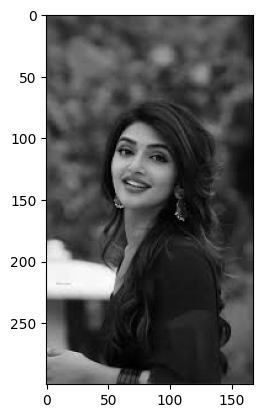

In [4]:
img = io.imread('eg.jpeg')
if len(img.shape) == 3:
  img = color.rgb2gray(img)
plt.imshow(img, cmap='gray')

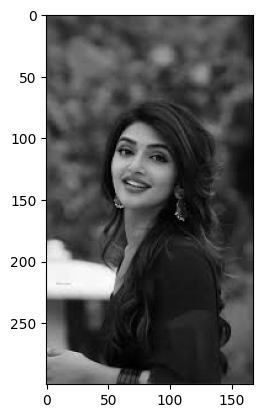

In [5]:
# image enhancement using mean/box filter
kernel_size = 1
kernel = np.ones((kernel_size, kernel_size)) / (kernel_size**5)
filtered_img = signal.convolve2d(img, kernel, mode='same', boundary='wrap')
plt.imshow(filtered_img, cmap='gray')

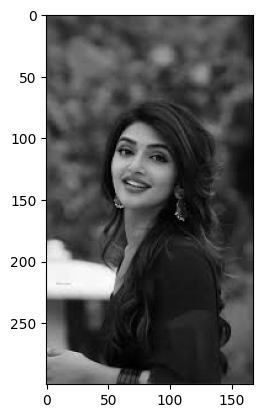

In [6]:
# Gaussian filter
sigma=0.00001
filtered_image2 = ndimage.gaussian_filter(img, sigma=sigma)
plt.imshow(filtered_image2, cmap='gray')

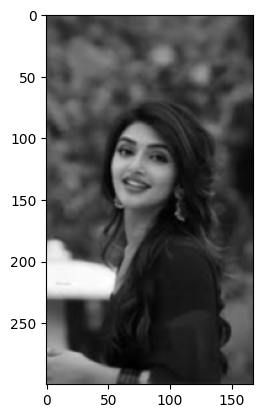

In [7]:
# Weighted kernel

kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
kernel = kernel/np.sum(kernel) # normalize

#Applying the filter
filtered_img3 = ndimage.convolve(img, kernel, mode='reflect')
plt.imshow(filtered_img3, cmap='gray')

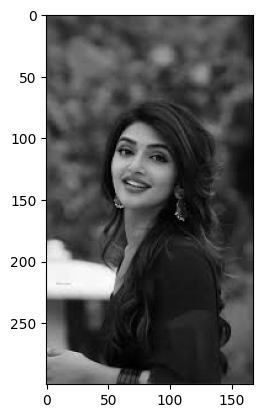

In [8]:
# Apply max filter
size = 1
filtered_img4 = ndimage.maximum_filter(img, size=size)
plt.imshow(filtered_img4, cmap='gray')

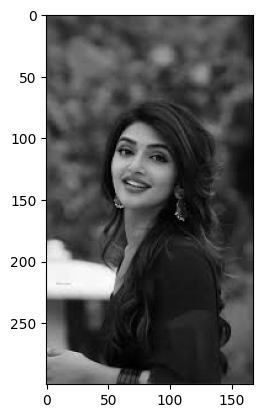

In [9]:
#median filter
size=1
filtered_img5 = ndimage.median_filter(img, size=size)
plt.imshow(filtered_img5, cmap='gray')

Text(0, 0.5, 'Frequency')

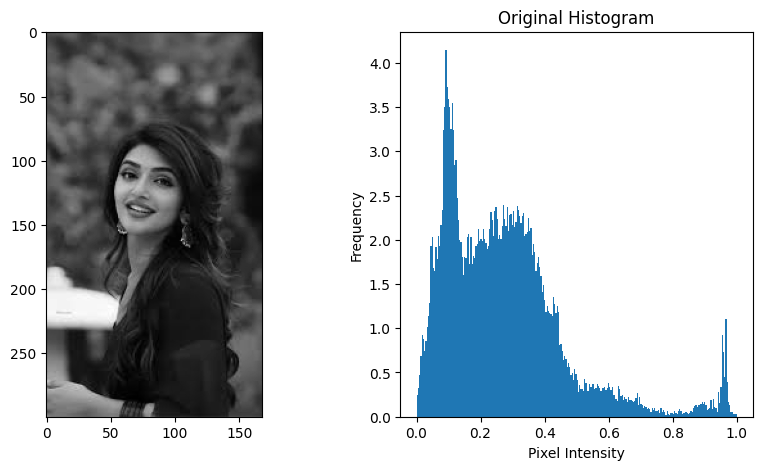

In [18]:
# Using Histogram

# Apply histogram equilization

# Original
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
# plot histogram of image intensities
plt.hist(img.ravel(), bins=256, range=(0, 1),density=True)
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity') # if subplot is used use set_xlabel, similarly for ylabel and title
plt.ylabel('Frequency')


<Figure size 1000x500 with 0 Axes>

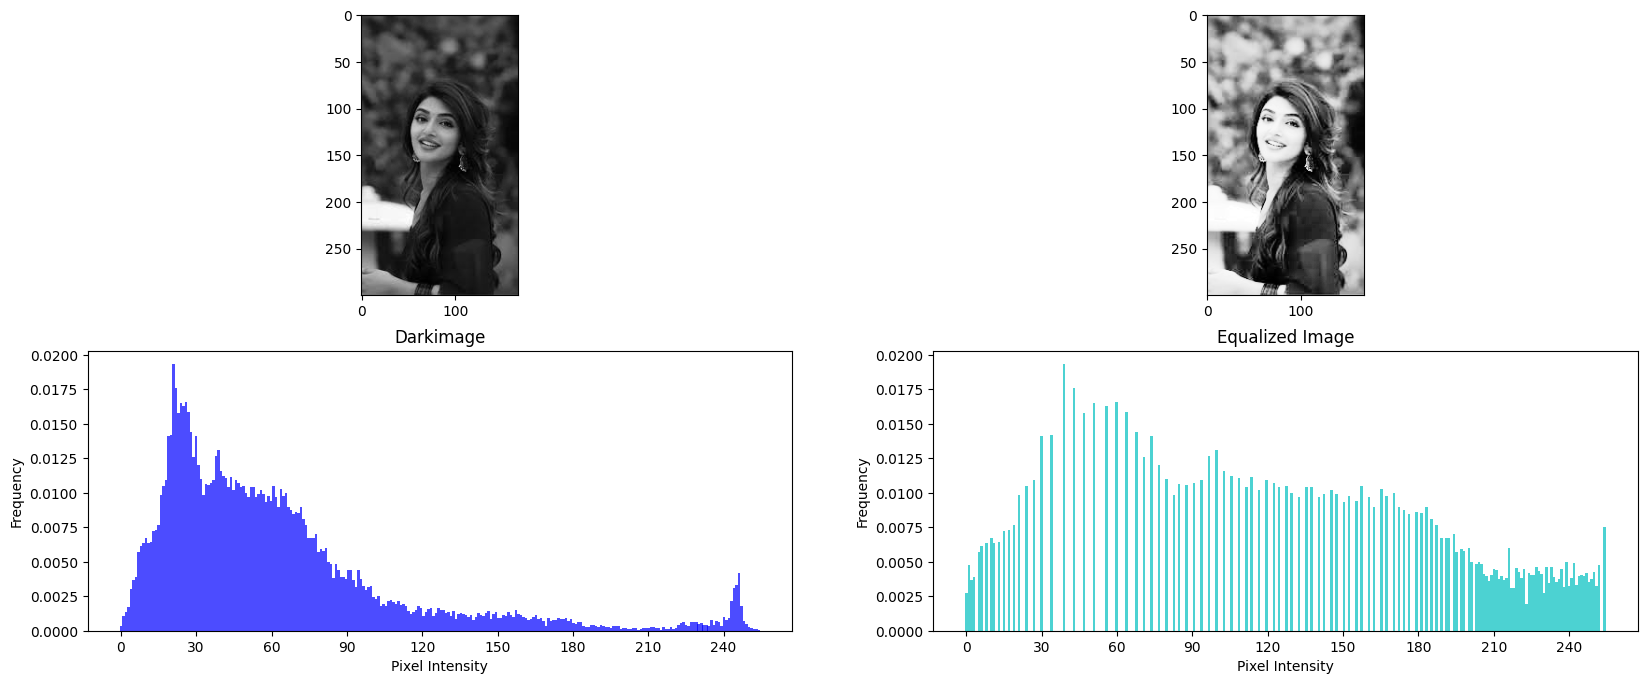

In [53]:
image = io.imread('eg.jpeg')

# Convert to grayscale if necessary
if len(image.shape) > 2:
    image = np.mean(image, axis=2)

# Compute histogram
hist1, bins1 = np.histogram(image.flatten(), 256, density=True)
cdf = hist1.cumsum()
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())

# Perform histogram equalization
equalized_image = cdf_normalized[image.astype(int)]

# Compute histogram for equalized image
hist2, bins2 = np.histogram(equalized_image.flatten(), 256, density=True)

# Display original and equalized images
plt.figure(figsize=(10, 5))

plt.figure(figsize=(20, 8))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(2, 2, 3)
plt.bar(bins1[:-1], hist1, width=1.0, color='b', alpha=0.7)
plt.title('Darkimage')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
# Set x-axis ticks at every 30th point
x_ticks = np.arange(0, len(bins1), 30)
plt.xticks(x_ticks)

plt.subplot(2, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.subplot(2, 2, 4)
plt.bar(bins2[:-1], hist2, width=1.0, color='c', alpha=0.7)
plt.title('Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
# Set x-axis ticks at every 30th point
x_ticks = np.arange(0, len(bins2), 30)
plt.xticks(x_ticks)

plt.show()


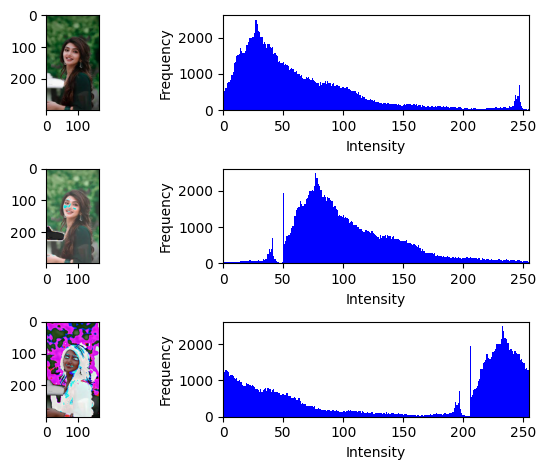

In [50]:
I = io.imread('eg.jpeg')

plt.subplot(3, 2, 1)
plt.imshow(I, cmap='gray')
plt.subplot(3, 2, 2)
plt.hist(I.flatten(), bins=256, range=(0, 255), color='b')
plt.xlim([0, 255])
plt.xlabel('Intensity')
plt.ylabel('Frequency')

# Histogram sliding by adding a constant value
I_shifted_up = np.clip(I + 50, 0, 255)
plt.subplot(3, 2, 3)
plt.imshow(I_shifted_up, cmap='gray')
plt.subplot(3, 2, 4)
plt.hist(I_shifted_up.flatten(), bins=256, range=(0, 255), color='b')
plt.xlim([0, 255])
plt.xlabel('Intensity')
plt.ylabel('Frequency')

# Histogram sliding by subtracting a constant value
I_shifted_down = np.clip(I - 50, 0, 255)
plt.subplot(3, 2, 5)
plt.imshow(I_shifted_down, cmap='gray')
plt.subplot(3, 2, 6)
plt.hist(I_shifted_down.flatten(), bins=256, range=(0, 255), color='b')
plt.xlim([0, 255])
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [47]:
# Using Histogram

# Apply histogram equilization

# Original
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
# plot histogram of image intensities
plt.hist(img.ravel(), bins=256, range=(0, 1),density=True)
plt.title('Original Histogram')
plt.xlabel('Pixel Intensity') # if subplot is used use set_xlabel, similarly for ylabel and title
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

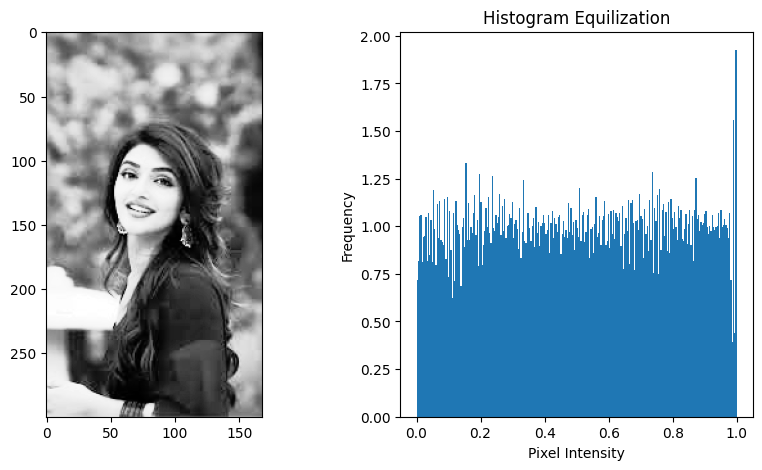

In [19]:
# Using Histogram

# Apply histogram equilization
from skimage import exposure
enhanced = exposure.equalize_hist(img)

# Histogram equilization
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(enhanced, cmap='gray')

plt.subplot(1,2,2)
# plot histogram of image intensities
plt.hist(enhanced.ravel(), bins=256, range=(0, 1),density=True)
plt.title('Histogram Equilization')
plt.xlabel('Pixel Intensity') # if subplot is used use set_xlabel, similarly for ylabel and title
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

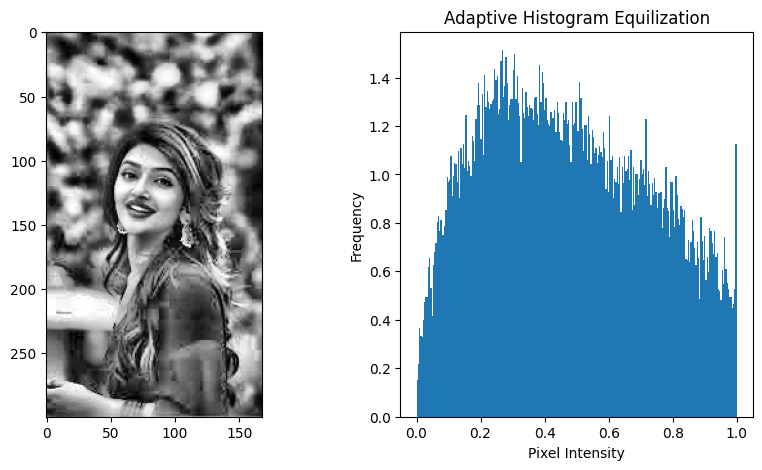

In [22]:
# Adaptive Histogram Equilization
enhanced = exposure.equalize_adapthist(img, clip_limit=0.03)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(enhanced, cmap='gray')

plt.subplot(1,2,2)
# plot histogram of image intensities
plt.hist(enhanced.ravel(), bins=256, range=(0, 1),density=True)
plt.title('Adaptive Histogram Equilization')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')


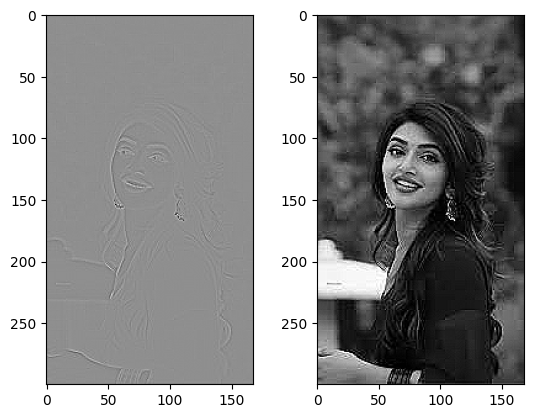

In [40]:
# Laplacian filter
img = img_as_float(img)
laplacian_kernel = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
laplacian = ndimage.convolve(img, laplacian_kernel)

plt.subplot(1,2,1)
plt.imshow(laplacian, cmap='gray')

# sharpen image by subtracting the laplacian
plt.subplot(1,2,2)
amount = 1.0
sharpened = img - amount * laplacian
sharpened = np.clip(sharpened, 0, 1)
plt.imshow(sharpened, cmap='gray')

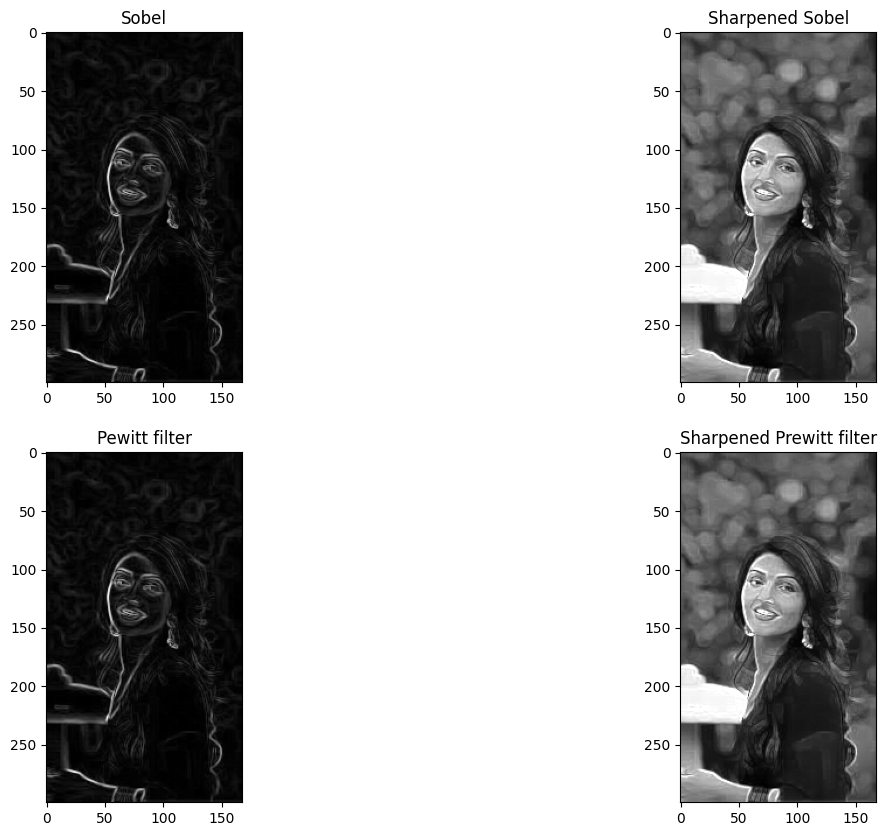

In [41]:
from re import S
# sharpening  filters Sobel and Pewitt filter

plt.figure(figsize=(15,10))
#sobel
plt.subplot(2,2,1)
plt.title('Sobel')
sobel_horizontal = ndimage.sobel(img, axis=0)
sobel_vertical = ndimage.sobel(img, axis=1)
sobel_magnitude = np.hypot(sobel_horizontal, sobel_vertical)
sobel_magnitude = sobel_magnitude/np.max(sobel_magnitude)
plt.imshow(sobel_magnitude, cmap='gray')

# sharpened sobel
amount = 1.0
plt.subplot(2,2,2)
plt.title('Sharpened Sobel')
sharpened = img + amount*sobel_magnitude
sharpened = np.clip(sharpened, 0, 1)
plt.imshow(sharpened, cmap='gray')

# Prewitt filter
plt.subplot(2,2,3)
plt.title('Pewitt filter')
prewitt_horizontal = ndimage.prewitt(img, axis=0)
prewitt_vertical = ndimage.prewitt(img, axis=1)
prewitt_magnitude = np.hypot(prewitt_horizontal, prewitt_vertical)
prewitt_magnitude = prewitt_magnitude/np.max(prewitt_magnitude)
plt.imshow(prewitt_magnitude, cmap='gray')

# Sharpened prewitt filter
amount = 1.0
plt.subplot(2,2,4)
plt.title('Sharpened Prewitt filter')
sharpened = img + amount*prewitt_magnitude
sharpened = np.clip(sharpened,0,1)
plt.imshow(sharpened, cmap='gray')

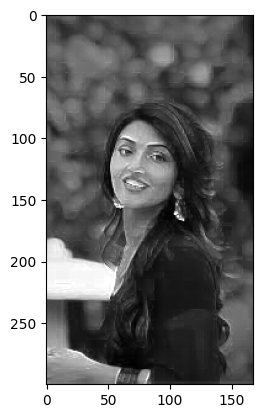

In [44]:
# Roberts filter

roberts_cross_v = np.array([[1,0],[0,-1]])
roberts_cross_h = np.array([[0,1],[-1,0]])

#apply filter
vertical = ndimage.convolve(img, roberts_cross_v)
horizontal = ndimage.convolve(img, roberts_cross_h)

roberts_mag = np.sqrt(np.square(horizontal) + np.square(vertical))
roberts_mag = roberts_mag / np.max(roberts_mag)

amount = 1.0
# sharpen
sharpened = img + amount * roberts_mag
    # Clip the values to be between 0 and 1
sharpened = np.clip(sharpened, 0, 1)
plt.imshow(sharpened, cmap='gray')

# Transformation

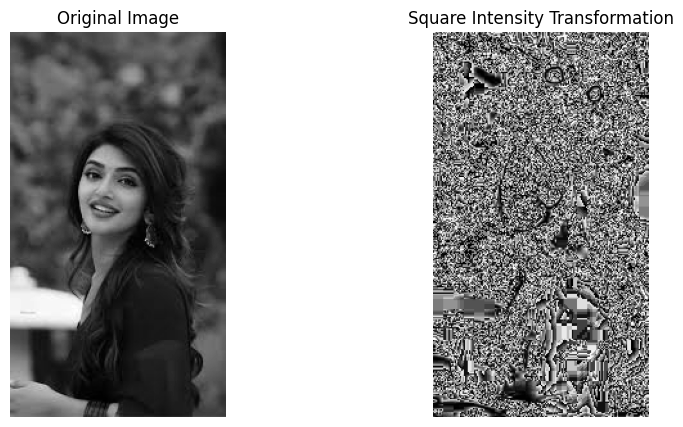

In [54]:
# Squared Transformation

image = img_as_ubyte(io.imread("eg.jpeg",as_gray=True))


# Define the square intensity transformation function
def square_intensity_transformation(image):
    squared_image = np.power(image, 2)
    squared_image = np.clip(squared_image, 0, 255)  # Clip pixel values to [0, 255]
    return squared_image.astype(np.uint8)  # Convert back to uint8 for image display

# Apply the square intensity transformation
transformed_image = square_intensity_transformation(image)

# Display original and transformed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Square Intensity Transformation')
plt.axis('off')

plt.show()


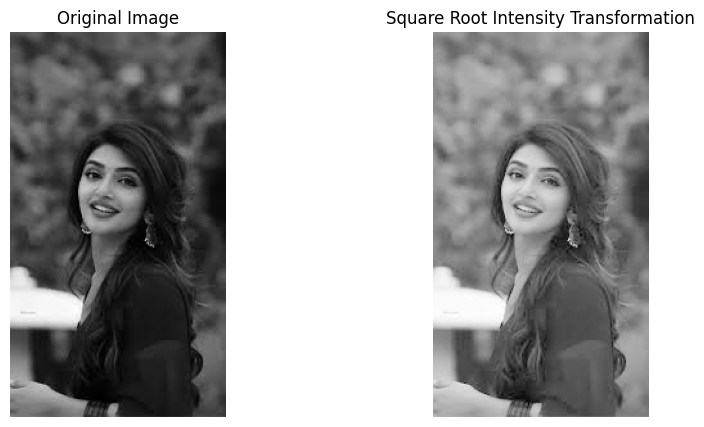

In [55]:
# Square Root Transformation

import numpy as np
import matplotlib.pyplot as plt

# Load an example image
image = img_as_ubyte(io.imread("eg.jpeg",as_gray=True))

# Define the square root intensity transformation function
def square_root_intensity_transformation(image):
    return np.sqrt(image)

# Apply the square root intensity transformation
transformed_image = square_root_intensity_transformation(image)

# Display original and transformed images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Square Root Intensity Transformation')
plt.axis('off')

plt.show()


In [ ]:
# similarly

# log transformation
c = 3
transformed_image = c * np.log1p(image)


# inverse log intensity transformation
transformed_image = np.exp(image / c)


# Convert the image array to integer data type
image = image.astype(np.uint8)
# Perform bit-plane slicing intensity transformation and plot the slices
for i in range(8):
    bit_plane = (image & (1 << i)) >> i
    plt.subplot(3, 3, i + 2)
    plt.imshow(bit_plane, cmap='gray')
    plt.title('Bit-Plane ' + str(i))


# Transformation (a): Highlights range [A, B] and reduces all others to lower values
transformation_a = np.where((image >= A) & (image <= B), image+200, 0)

# Transformation (b): Highlights range [A, B] and leaves other intensities unchanged
transformation_b = np.where((image >= A) & (image <= B), image+200, image)


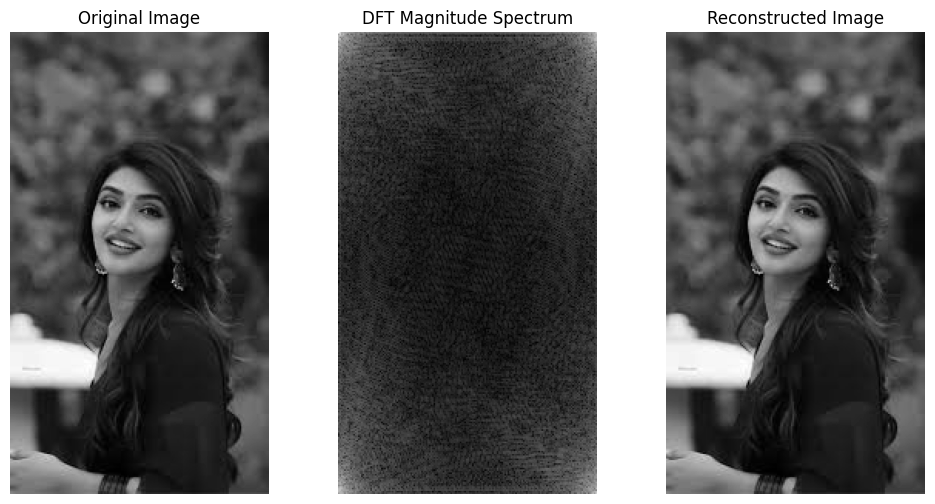

In [56]:
# DFT
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, io
from scipy.fft import fft2, ifft2

# Load the image
image = io.imread("eg.jpeg", as_gray=True)

# Compute the 2-dimensional DFT of the image
dft_image = fft2(image)

# Compute the inverse DFT to reconstruct the image
reconstructed_image = ifft2(dft_image).real

# Display the original and reconstructed images
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(np.log(1 + np.abs(dft_image)), cmap='gray')
plt.title('DFT Magnitude Spectrum')
plt.axis('off')

plt.subplot(133)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()
